 # Import Library 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.preprocessing import LabelEncoder

# Load Dataset

In [51]:
# Load dataset
data = pd.read_csv('dataset.csv')

# Cek 5 baris pertama
print(data.head())

          Age  Income Student Credit_Rating  Buys_Computer
0         Tua  Tinggi      Ya         Buruk              0
1  Paruh Baya  Tinggi      Ya          Baik              1
2  Paruh Baya  Rendah   Tidak         Buruk              1
3         Tua  Rendah   Tidak          Baik              1
4         Tua  Rendah      Ya          Baik              1


# Data Cleaning & Exploratory Data Analysis (EDA)

In [52]:
print(data.isnull().sum())

Age              0
Income           0
Student          0
Credit_Rating    0
Buys_Computer    0
dtype: int64


Buys_Computer
1    669
0    331
Name: count, dtype: int64


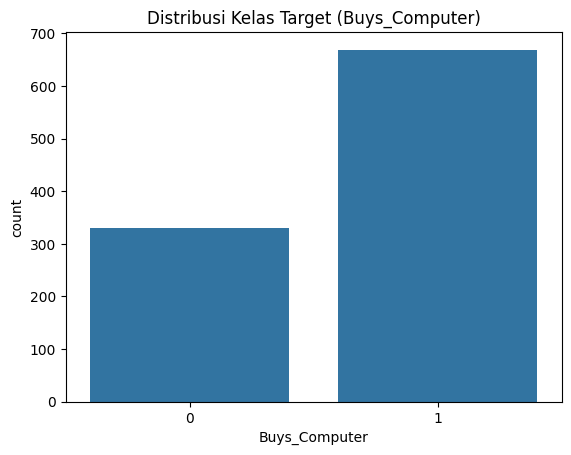

In [53]:
print(data['Buys_Computer'].value_counts())

# Visualisasi distribusi
sns.countplot(x='Buys_Computer', data=data)
plt.title("Distribusi Kelas Target (Buys_Computer)")
plt.show()

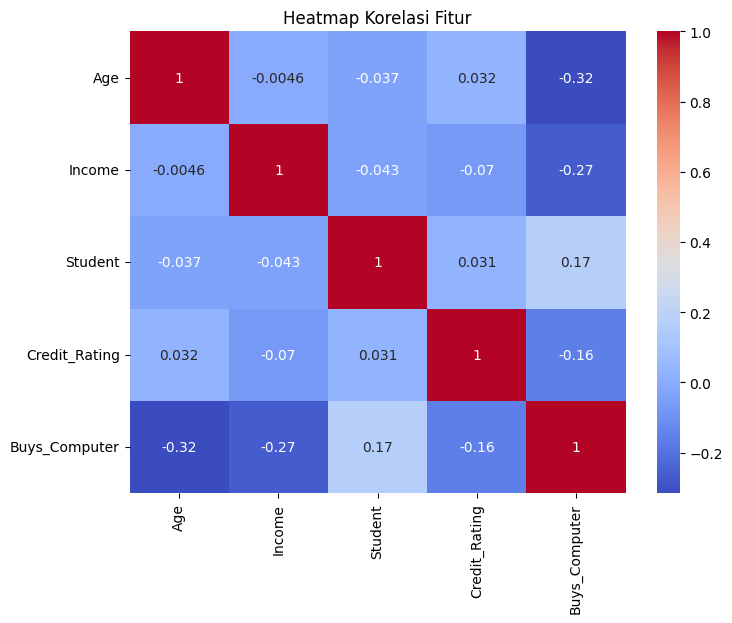

In [54]:
# Encoding sementara untuk EDA
data_encoded = data.copy()
le = LabelEncoder()
for col in ['Age', 'Income', 'Student', 'Credit_Rating']:
    data_encoded[col] = le.fit_transform(data_encoded[col])

# Heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()

# Data Preprocessing

In [55]:
# Buat salinan data untuk encoding
data_clean = data.copy()

# Label Encoding untuk fitur kategorikal
le = LabelEncoder()
for col in ['Age', 'Income', 'Student', 'Credit_Rating']:
    data_clean[col] = le.fit_transform(data_clean[col])

# Pisahkan fitur (X) dan target (y)
X = data_clean.drop('Buys_Computer', axis=1)
y = data_clean['Buys_Computer']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Stratified sampling untuk handle imbalance
)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (800, 4), Test set: (200, 4)


# Membangun Model Decision Tree

In [57]:
# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(
    criterion='entropy',  # Gunakan entropy untuk splitting
    max_depth=4,         # Batas kedalaman pohon
    min_samples_split=10, # Minimal sampel untuk split
    random_state=42
)

# Training model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=10,
                       random_state=42)

In [58]:
y_pred = dt_model.predict(X_test)

In [59]:
print("=== Hasil Evaluasi ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

=== Hasil Evaluasi ===
Accuracy: 0.80
Precision: 0.84
Recall: 0.85
F1-Score: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.69        66
           1       0.84      0.85      0.85       134

    accuracy                           0.80       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.79      0.80      0.79       200



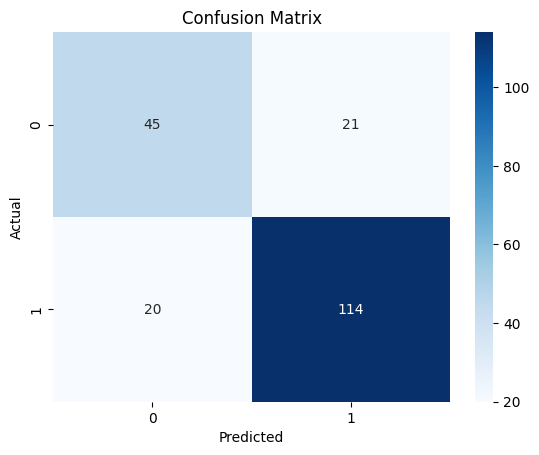

In [60]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

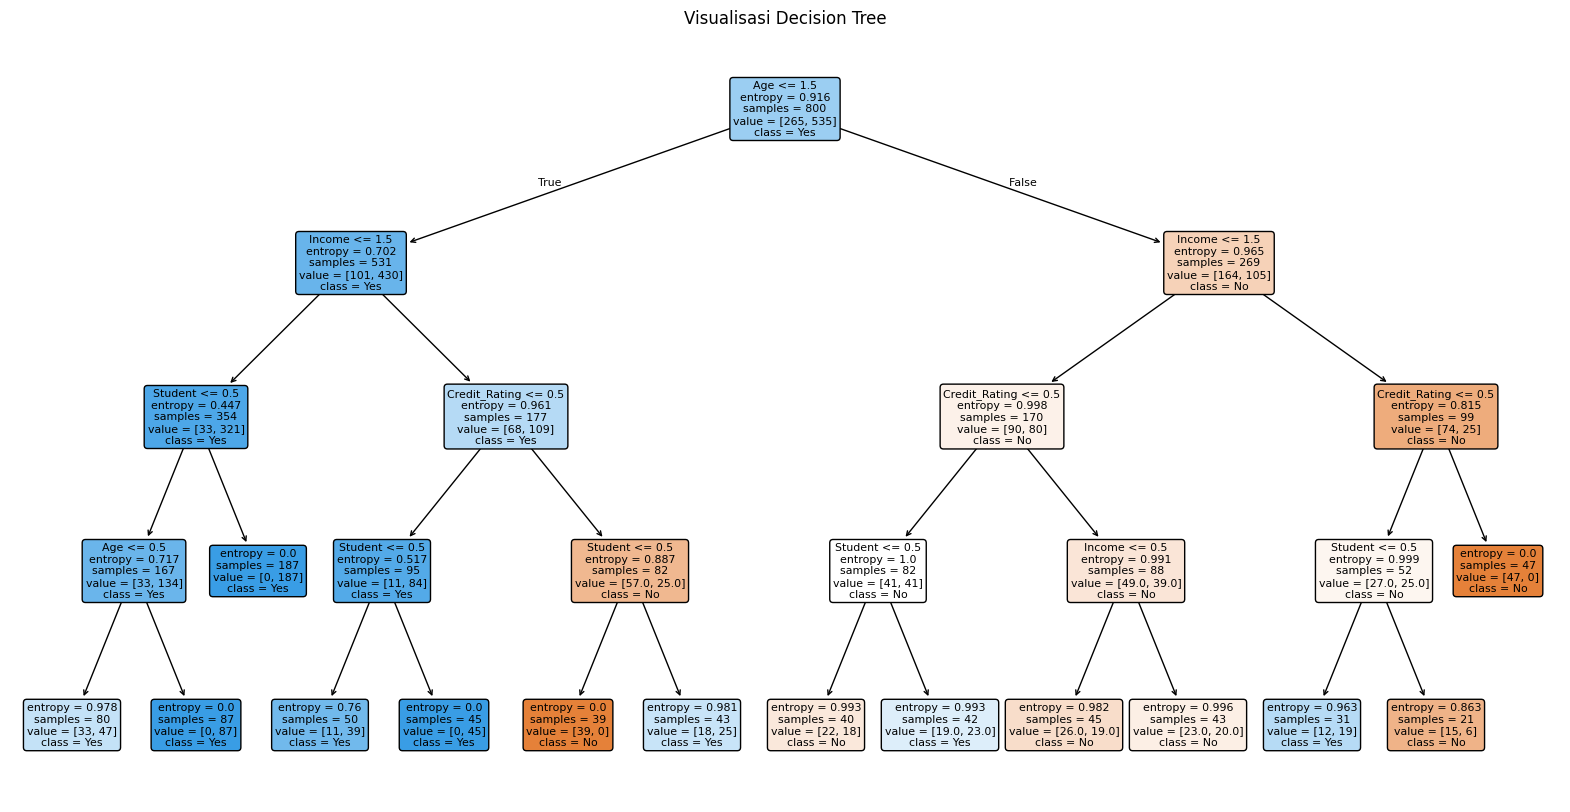

In [61]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True
)
plt.title("Visualisasi Decision Tree")
plt.show()


Feature Importance:
         Feature  Importance
0            Age    0.397096
2        Student    0.236685
3  Credit_Rating    0.216078
1         Income    0.150141


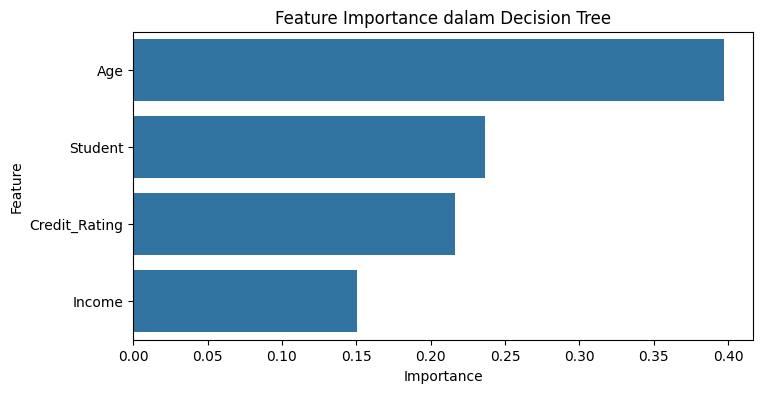

In [62]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance dalam Decision Tree')
plt.show()

# Implementasi Model

In [63]:
# Fungsi sederhana untuk memprediksi data baru
def prediksi_pembelian_komputer(model, umur, pendapatan, mahasiswa, rating_kredit):
    """
    Memprediksi apakah pelanggan akan membeli komputer berdasarkan atribut mereka
    
    Parameter:
    -----------
    model: Model decision tree yang sudah dilatih
    umur: Kategori umur ('<=30', '31...40', '>40')
    pendapatan: Tingkat pendapatan ('low', 'medium', 'high')
    mahasiswa: Status mahasiswa ('yes', 'no')
    rating_kredit: Rating kredit ('fair', 'excellent')
    
    Hasil:
    --------
    prediksi: 'Yes' atau 'No'
    probabilitas: Probabilitas kelas 'Yes'
    """
    # Buat encoder baru dengan kategori yang sama seperti pada pelatihan
    encoder_umur = LabelEncoder()
    encoder_umur.fit(['<=30', '31...40', '>40'])
    
    encoder_pendapatan = LabelEncoder()
    encoder_pendapatan.fit(['low', 'medium', 'high'])
    
    encoder_mahasiswa = LabelEncoder()
    encoder_mahasiswa.fit(['no', 'yes'])
    
    encoder_kredit = LabelEncoder()
    encoder_kredit.fit(['fair', 'excellent'])
    
    # Buat DataFrame untuk pelanggan baru
    pelanggan_baru = pd.DataFrame({
        'Age': [umur],
        'Income': [pendapatan],
        'Student': [mahasiswa],
        'Credit_Rating': [rating_kredit]
    })
    
    # Encode fitur-fitur
    pelanggan_baru_encoded = pd.DataFrame({
        'Age': encoder_umur.transform([umur]),
        'Income': encoder_pendapatan.transform([pendapatan]),
        'Student': encoder_mahasiswa.transform([mahasiswa]),
        'Credit_Rating': encoder_kredit.transform([rating_kredit])
    })
    
    # Buat prediksi
    prediksi = model.predict(pelanggan_baru_encoded)[0]
    probabilitas = model.predict_proba(pelanggan_baru_encoded)[0][1]  # Probabilitas kelas 'Yes'
    
    return prediksi, probabilitas


In [64]:
# Uji model dengan contoh pelanggan
print("\n===== Pengujian Model dengan Pelanggan Baru =====")

# Contoh pelanggan 1: Muda, pendapatan tinggi, bukan mahasiswa, kredit cukup
prediksi1, probabilitas1 = prediksi_pembelian_komputer(
    dt_model,
    umur='<=30',
    pendapatan='high',
    mahasiswa='no',
    rating_kredit='fair'
)
print(f"Pelanggan 1: Muda, pendapatan tinggi, bukan mahasiswa, kredit cukup")
print(f"Akan membeli komputer? {prediksi1} (Tingkat kepercayaan: {probabilitas1:.2f})")


===== Pengujian Model dengan Pelanggan Baru =====
Pelanggan 1: Muda, pendapatan tinggi, bukan mahasiswa, kredit cukup
Akan membeli komputer? 1 (Tingkat kepercayaan: 1.00)


In [65]:
# Contoh pelanggan 2: Umur menengah, pendapatan menengah, mahasiswa, kredit bagus
prediksi2, probabilitas2 = prediksi_pembelian_komputer(
    dt_model,
    umur='31...40',
    pendapatan='medium',
    mahasiswa='yes',
    rating_kredit='excellent'
)
print(f"Pelanggan 2: Umur menengah, pendapatan menengah, mahasiswa, kredit bagus")
print(f"Akan membeli komputer? {prediksi2} (Tingkat kepercayaan: {probabilitas2:.2f})")


Pelanggan 2: Umur menengah, pendapatan menengah, mahasiswa, kredit bagus
Akan membeli komputer? 1 (Tingkat kepercayaan: 1.00)


In [66]:
# Contoh pelanggan 3: Lebih tua, pendapatan rendah, mahasiswa, kredit cukup
prediksi3, probabilitas3 = prediksi_pembelian_komputer(
    dt_model,
    umur='>40',
    pendapatan='low',
    mahasiswa='yes',
    rating_kredit='fair'
)
print(f"Pelanggan 3: Lebih tua, pendapatan rendah, mahasiswa, kredit cukup")
print(f"Akan membeli komputer? {prediksi3} (Tingkat kepercayaan: {probabilitas3:.2f})")

Pelanggan 3: Lebih tua, pendapatan rendah, mahasiswa, kredit cukup
Akan membeli komputer? 0 (Tingkat kepercayaan: 0.47)
